In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Deep learning packages
from keras.models import Sequential
from keras.layers import LSTM, Dense

#enable IPython to display matplolib graphs
%matplotlib inline


2022-02-28 12:03:21.376227: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-28 12:03:21.376243: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
df = pd.read_csv('./data/ouput.csv')

In [3]:
df.head()

,LCLid,tstp,energy(kWh/hh)
0,MAC000168,2011-11-24 13:30:00,0.054
1,MAC000168,2011-11-24 14:00:00,0.178
2,MAC000168,2011-11-24 14:30:00,0.113
3,MAC000168,2011-11-24 15:00:00,0.068
4,MAC000168,2011-11-24 15:30:00,0.061


In [4]:
df.shape

(396562, 3)

In [5]:
df['tstp'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['tstp']]
#df["tstp"] = pd.to_datetime(df["tstp"])
df["energy(kWh/hh)"] = pd.to_numeric(df["energy(kWh/hh)"], downcast="float", errors="coerce")

max_value_energy = df["energy(kWh/hh)"].max()
max_value_energy


4.595

In [6]:
df['energy(kWh/hh)'] = df['energy(kWh/hh)'].apply(lambda x: x / max_value_energy)

In [7]:
# Sorting the values
df.sort_values('tstp', inplace=True)

In [8]:
df.head()

,LCLid,tstp,energy(kWh/hh)
356842,MAC000150,2011-11-23 10:00:00,0.065506
356843,MAC000150,2011-11-23 10:30:00,0.027639
356844,MAC000150,2011-11-23 11:00:00,0.043743
356845,MAC000150,2011-11-23 11:30:00,0.122742
356846,MAC000150,2011-11-23 12:00:00,0.034603


In [9]:
df['energy(kWh/hh)'].max()

1.0

In [10]:
df['energy(kWh/hh)'].min()

0.0

In [11]:
# Deep Learning (LSTM)

# Defining the number of neurons in the LSTM layer
n_layer = 5

# Defining how many lags will be used in the time series
n_lag = 3


# Defining the model
model = Sequential()
model.add(LSTM(n_layer, activation='relu', input_shape=(n_lag, 1)))
model.add(Dense(1))

model.summary()

# The objective functions which will be minimized is mean squared error (mse)
model.compile(optimizer='adam', loss='mse')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5)                 140       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 146
Trainable params: 146
Non-trainable params: 0
_________________________________________________________________


2022-02-28 12:03:24.722894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-28 12:03:24.723370: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-28 12:03:24.723420: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-02-28 12:03:24.723460: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-02-28 12:03:24.723499: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [12]:
from LSTMModel import LSTMModel

In [13]:
lclid_list = df['LCLid'].unique()
def find_household(identification):
    affluenthh_filt = df["LCLid"] == identification
    affluent_hh_data = df[affluenthh_filt]
    return affluent_hh_data

hh = find_household("MAC000150")
hh.pop("LCLid")
hh = hh.set_index("tstp")
hh = hh.resample("H").sum()
hh = hh.reset_index()

In [14]:
#normalizedtstp = (hh["tstp"] - hh["tstp"].mean()) / hh["tstp"].std()
#normalizedtstp
type(hh.iloc[0]["energy(kWh/hh)"])

numpy.float64

In [15]:
# Initiating the class
deep_learner = LSTMModel(
data = hh,
Y_var = 'energy(kWh/hh)',
lag = 24,
LSTM_layer_depth = 50,
epochs = 10,
batch_size = 256,
train_test_split = 0.15
)


In [16]:
# Fitting the model

model = deep_learner.LSTModel()

Epoch 1/10
66/66 [==============================] - 1s 13ms/step - loss: 0.0082 - val_loss: 0.0076
Epoch 2/10
66/66 [==============================] - 1s 11ms/step - loss: 0.0064 - val_loss: 0.0066
Epoch 3/10
66/66 [==============================] - 1s 11ms/step - loss: 0.0057 - val_loss: 0.0057
Epoch 4/10
66/66 [==============================] - 1s 12ms/step - loss: 0.0054 - val_loss: 0.0055
Epoch 5/10
66/66 [==============================] - 1s 12ms/step - loss: 0.0053 - val_loss: 0.0054
Epoch 6/10
66/66 [==============================] - 1s 11ms/step - loss: 0.0052 - val_loss: 0.0053
Epoch 7/10
66/66 [==============================] - 1s 11ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 8/10
66/66 [==============================] - 1s 11ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 9/10
66/66 [==============================] - 1s 11ms/step - loss: 0.0051 - val_loss: 0.0051
Epoch 10/10
66/66 [==============================] - 1s 11ms/step - loss: 0.0051 - val_loss: 0.0051


In [17]:
# Defining the lag that we used for training of the model 
lag_model = 24
# Getting the last period
ts = hh['energy(kWh/hh)'].tail(lag_model).values.tolist()
# Creating the X matrix for the model
X, _ = deep_learner.create_X_Y(ts, lag=lag_model)
# Getting the forecast
yhat = model.predict(X)
yhat

array([[0.04203464]], dtype=float32)

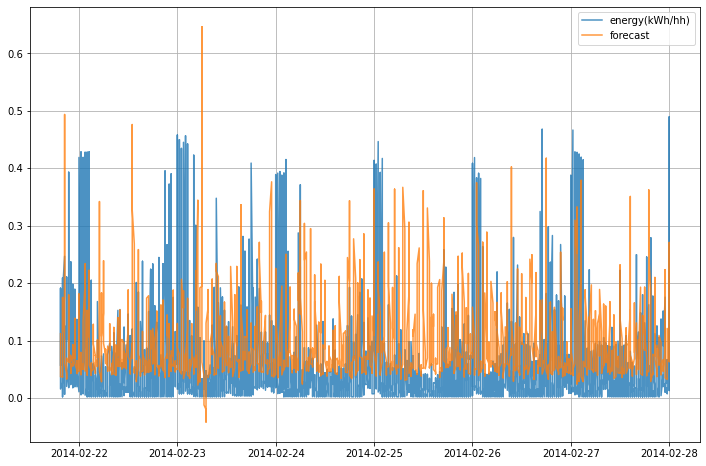

In [18]:
yhat = deep_learner.predict()
# Constructing the forecast dataframe
fc = df.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['energy(kWh/hh)', 'forecast']:
  plt.plot(
    'tstp',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()

/tmp/ipykernel_56020/1181257990.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fc = fc.append(hat_frame)


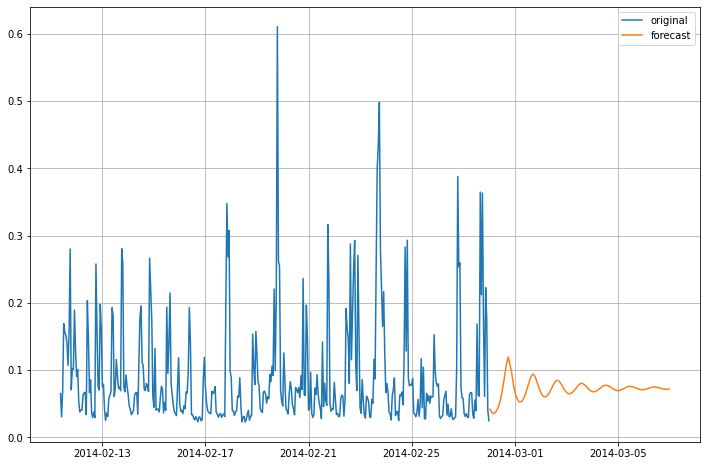

In [19]:


# Forecasting n steps ahead
n_ahead = 168
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y[0][0] for y in yhat]

# Constructing the forecast dataframe
fc = hh.tail(400).copy() 
fc['type'] = 'original'

last_date = max(fc['tstp'])
hat_frame = pd.DataFrame({
    'tstp': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'energy(kWh/hh)': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)

# Ploting the forecasts 
plt.figure(figsize=(12, 8))
for col_type in ['original', 'forecast']:
    plt.plot(
        'tstp', 
        'energy(kWh/hh)', 
        data=fc[fc['type']==col_type],
        label=col_type
        )

plt.legend()
plt.grid()   

In [20]:
import math

def rmse(y_true, y_pred):
	squared_error = 0
	n = len(y_true)
	
	for i in range(n):
		squared_error += (y_true[i] - y_pred[i]) ** 2
	root_mse = math.sqrt(squared_error / n)
	return root_mse

In [21]:
f =deep_learner.evaluateMSE()
f

[0.06811752 0.06354734 0.04047878 ... 0.17606094 0.04047878 0.02459195]
[0.11210037, 0.07141128, 0.058287155, 0.042740997, 0.038739808, 0.036995213, 0.037782386, 0.03687115, 0.07528506, 0.17509408, 0.12241999, 0.080015995, 0.07857029, 0.06519422, 0.11240661, 0.114468604, 0.17897697, 0.31787616, 0.49338928, 0.28445575, 0.16235349, 0.16062626, 0.16614747, 0.108169645, 0.07321706, 0.061640244, 0.043167647, 0.035624783, 0.03352947, 0.034959592, 0.037100255, 0.04071729, 0.042210747, 0.05564408, 0.054629546, 0.06985678, 0.062367123, 0.123469114, 0.17969859, 0.1538246, 0.09782308, 0.082809225, 0.062234547, 0.06758035, 0.062865704, 0.06351706, 0.060014054, 0.05002694, 0.045650557, 0.04457553, 0.042942103, 0.044973254, 0.04544564, 0.047644883, 0.06519887, 0.07482454, 0.062468667, 0.059605233, 0.05600524, 0.07087378, 0.09287997, 0.07656441, 0.07166295, 0.06750122, 0.08336461, 0.07027029, 0.06945244, 0.101088986, 0.077841155, 0.08303202, 0.13881035, 0.098551236, 0.08378259, 0.07644034, 0.06579986

In [22]:
import math
math.sqrt(f)

TypeError: must be real number, not NoneType

In [23]:
#deep_learner.save_lstm_model()

2022-02-28 12:04:00.225302: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./saved_models/lstm_model/assets


[0.11210037,
 0.07141128,
 0.058287155,
 0.042740997,
 0.038739808,
 0.036995213,
 0.037782386,
 0.03687115,
 0.07528506,
 0.17509408,
 0.12241999,
 0.080015995,
 0.07857029,
 0.06519422,
 0.11240661,
 0.114468604,
 0.17897697,
 0.31787616,
 0.49338928,
 0.28445575,
 0.16235349,
 0.16062626,
 0.16614747,
 0.108169645,
 0.07321706,
 0.061640244,
 0.043167647,
 0.035624783,
 0.03352947,
 0.034959592,
 0.037100255,
 0.04071729,
 0.042210747,
 0.05564408,
 0.054629546,
 0.06985678,
 0.062367123,
 0.123469114,
 0.17969859,
 0.1538246,
 0.09782308,
 0.082809225,
 0.062234547,
 0.06758035,
 0.062865704,
 0.06351706,
 0.060014054,
 0.05002694,
 0.045650557,
 0.04457553,
 0.042942103,
 0.044973254,
 0.04544564,
 0.047644883,
 0.06519887,
 0.07482454,
 0.062468667,
 0.059605233,
 0.05600524,
 0.07087378,
 0.09287997,
 0.07656441,
 0.07166295,
 0.06750122,
 0.08336461,
 0.07027029,
 0.06945244,
 0.101088986,
 0.077841155,
 0.08303202,
 0.13881035,
 0.098551236,
 0.08378259,
 0.07644034,
 0.065799